In [19]:
import pandas as pd

# Function to process each row and extract additional elements
def process_row(row):
    elements = row.split(',')
    # First 5 elements are standard columns
    standard_columns = elements[:5]
    # Remaining elements are combined into a list
    additional_info = elements[5:]
    return standard_columns + [additional_info]

# Read the CSV file line by line and process each row
processed_data = []
with open('output_crawler.csv', 'r') as file:
    # Skip the header
    next(file)
    for line in file:
        # Skip empty lines
        if line.strip():
            processed_data.append(process_row(line.strip()))

# Create a DataFrame from the processed data
new_df = pd.DataFrame(processed_data, columns=["city_topic", "city_origin", "username", "sex", "user_personas", "needs_list"])
new_df['needs_list'] = new_df['needs_list'].apply(lambda x: x if isinstance(x, list) else [])

print(len(new_df))

527


In [20]:
# cleaning the dataframe
import pandas as pd

# Assuming 'new_df' is your DataFrame and 'needs_list' is the column name

# Function to check if 'spam' is in the needs list or if the list is empty
def filter_spam_and_empty(needs_list):
    if 'spam' in needs_list:
        return False
    if 'impossible' in needs_list:
        return False
    if 'impossibile' in needs_list:
        return False
    if '' in needs_list:
        return False
    if not needs_list:  # This checks if the list is empty
        return False
    return True

# Apply the filter function to the DataFrame
new_df = new_df[new_df['needs_list'].apply(filter_spam_and_empty)]
#drop rows in new_df in which need_list contains the word 'impossible'
new_df = new_df[new_df.needs_list.astype(bool)]
print(len(new_df))
print(type(new_df['needs_list']))

417
<class 'pandas.core.series.Series'>


In [8]:
# Assuming 'new_df' is your DataFrame
most_frequent_user_personas = new_df['user_personas'].value_counts().idxmax()
print("Most frequent user_personas element:", most_frequent_user_personas)

Most frequent user_personas element: tourist


In [9]:
from collections import Counter

# Flatten the list of lists in 'additional_info' into a single list
additional_info_flattened = [item for sublist in new_df['needs_list'] for item in sublist]

# Count the occurrences of each element
additional_info_counts = Counter(additional_info_flattened)

# Find the most frequent element
most_frequent_additional_info = additional_info_counts.most_common(1)[0][0]
print("Most frequent element in needs_list:", most_frequent_additional_info)

Most frequent element in needs_list: travel advice


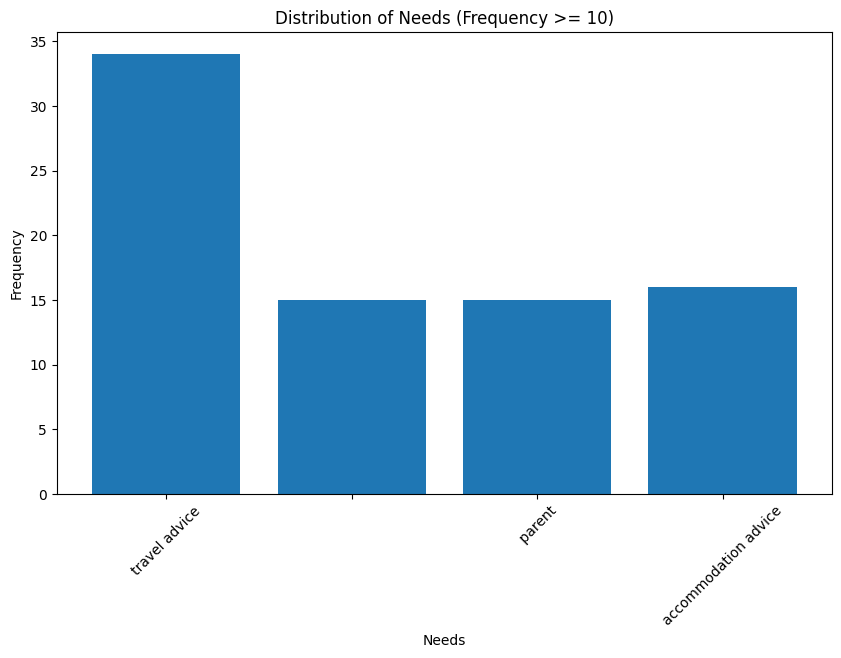

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'new_df' is your DataFrame and 'needs_list' is the column name

# Flatten the 'needs_list' into a single list
all_needs = [need for sublist in new_df['needs_list'] for need in sublist]

# Count the occurrences of each need
needs_counts = Counter(all_needs)

# Filter out needs with a frequency below 10
filtered_needs_counts = {need: count for need, count in needs_counts.items() if count >= 10}

# Prepare data for plotting
needs, counts = zip(*filtered_needs_counts.items())

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(needs, counts)
plt.xlabel('Needs')
plt.ylabel('Frequency')
plt.title('Distribution of Needs (Frequency >= 10)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()
